In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("NBAData.csv")
df.head()

,Year,Player,Position,Team,Salary,Length of Contract,Age,G,GS,MP,...,STL%,BLK%,TOV%,USG%,ORtg,DRtg,OWS,DWS,WS,WS/48
0,2012-2013,Blake Griffin,Forward,Los Angeles Clippers,18668431.0,5,23,80,80,32.5,...,2.0,1.6,12.8,25.4,114,102,6.8,3.9,10.6,0.196
1,2012-2013,Chris Paul,Guard,Los Angeles Clippers,16441500.0,5,27,70,70,33.4,...,3.8,0.4,13.7,22.6,127,102,10.6,3.4,13.9,0.287
2,2012-2013,JJ Redick,Guard,Los Angeles Clippers,10079404.0,4,28,78,13,30.5,...,0.8,0.3,12.5,20.8,111,113,4.0,0.5,4.5,0.091
3,2010-2011,DeAndre Jordan,Center,Los Angeles Clippers,6500000.0,4,22,80,66,25.6,...,1.0,5.4,18.8,11.7,116,105,2.6,2.6,5.2,0.122
4,2011-2012,Jamal Crawford,Guard,Los Angeles Clippers,5000000.0,4,31,60,6,26.9,...,1.8,0.7,11.8,26.6,102,109,1.6,0.7,2.3,0.069


In [13]:
df1 = df.iloc[:,4:]
df1

,Salary,Length of Contract,Age,G,GS,MP,FG,FGA,FG%,3P,...,STL%,BLK%,TOV%,USG%,ORtg,DRtg,OWS,DWS,WS,WS/48
0,18668431.0,5,23,80,80,32.5,7.2,13.4,0.538,0.1,...,2.0,1.6,12.8,25.4,114,102,6.8,3.9,10.6,0.196
1,16441500.0,5,27,70,70,33.4,5.9,12.2,0.481,1.1,...,3.8,0.4,13.7,22.6,127,102,10.6,3.4,13.9,0.287
2,10079404.0,4,28,78,13,30.5,4.9,11.3,0.434,2.1,...,0.8,0.3,12.5,20.8,111,113,4.0,0.5,4.5,0.091
3,6500000.0,4,22,80,66,25.6,2.9,4.3,0.686,0.0,...,1.0,5.4,18.8,11.7,116,105,2.6,2.6,5.2,0.122
4,5000000.0,4,31,60,6,26.9,4.7,12.3,0.384,1.3,...,1.8,0.7,11.8,26.6,102,109,1.6,0.7,2.3,0.069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,3480453.0,4,27,60,56,31.8,4.4,10.7,0.407,1.0,...,2.2,0.4,19.6,20.8,99,109,0.7,1.0,1.7,0.042
212,1590000.0,2,33,75,66,33.7,4.4,11.0,0.403,1.9,...,2.5,1.2,9.8,17.5,105,106,1.9,2.6,4.6,0.086
213,1399507.0,1,35,18,11,23.9,3.1,5.2,0.602,0.0,...,2.0,3.4,12.6,13.7,114,104,0.6,0.6,1.2,0.128
214,1272279.0,1,30,66,9,22.1,3.2,7.2,0.441,0.5,...,1.5,0.2,17.2,19.3,106,111,1.5,0.7,2.2,0.071


In [15]:
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

In [59]:
X = df1.drop('Salary', axis = 1)
y = df['Salary']/1000000
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [60]:
clf = tree.DecisionTreeRegressor(max_depth = 4)
clf = clf.fit(X_train, y_train)

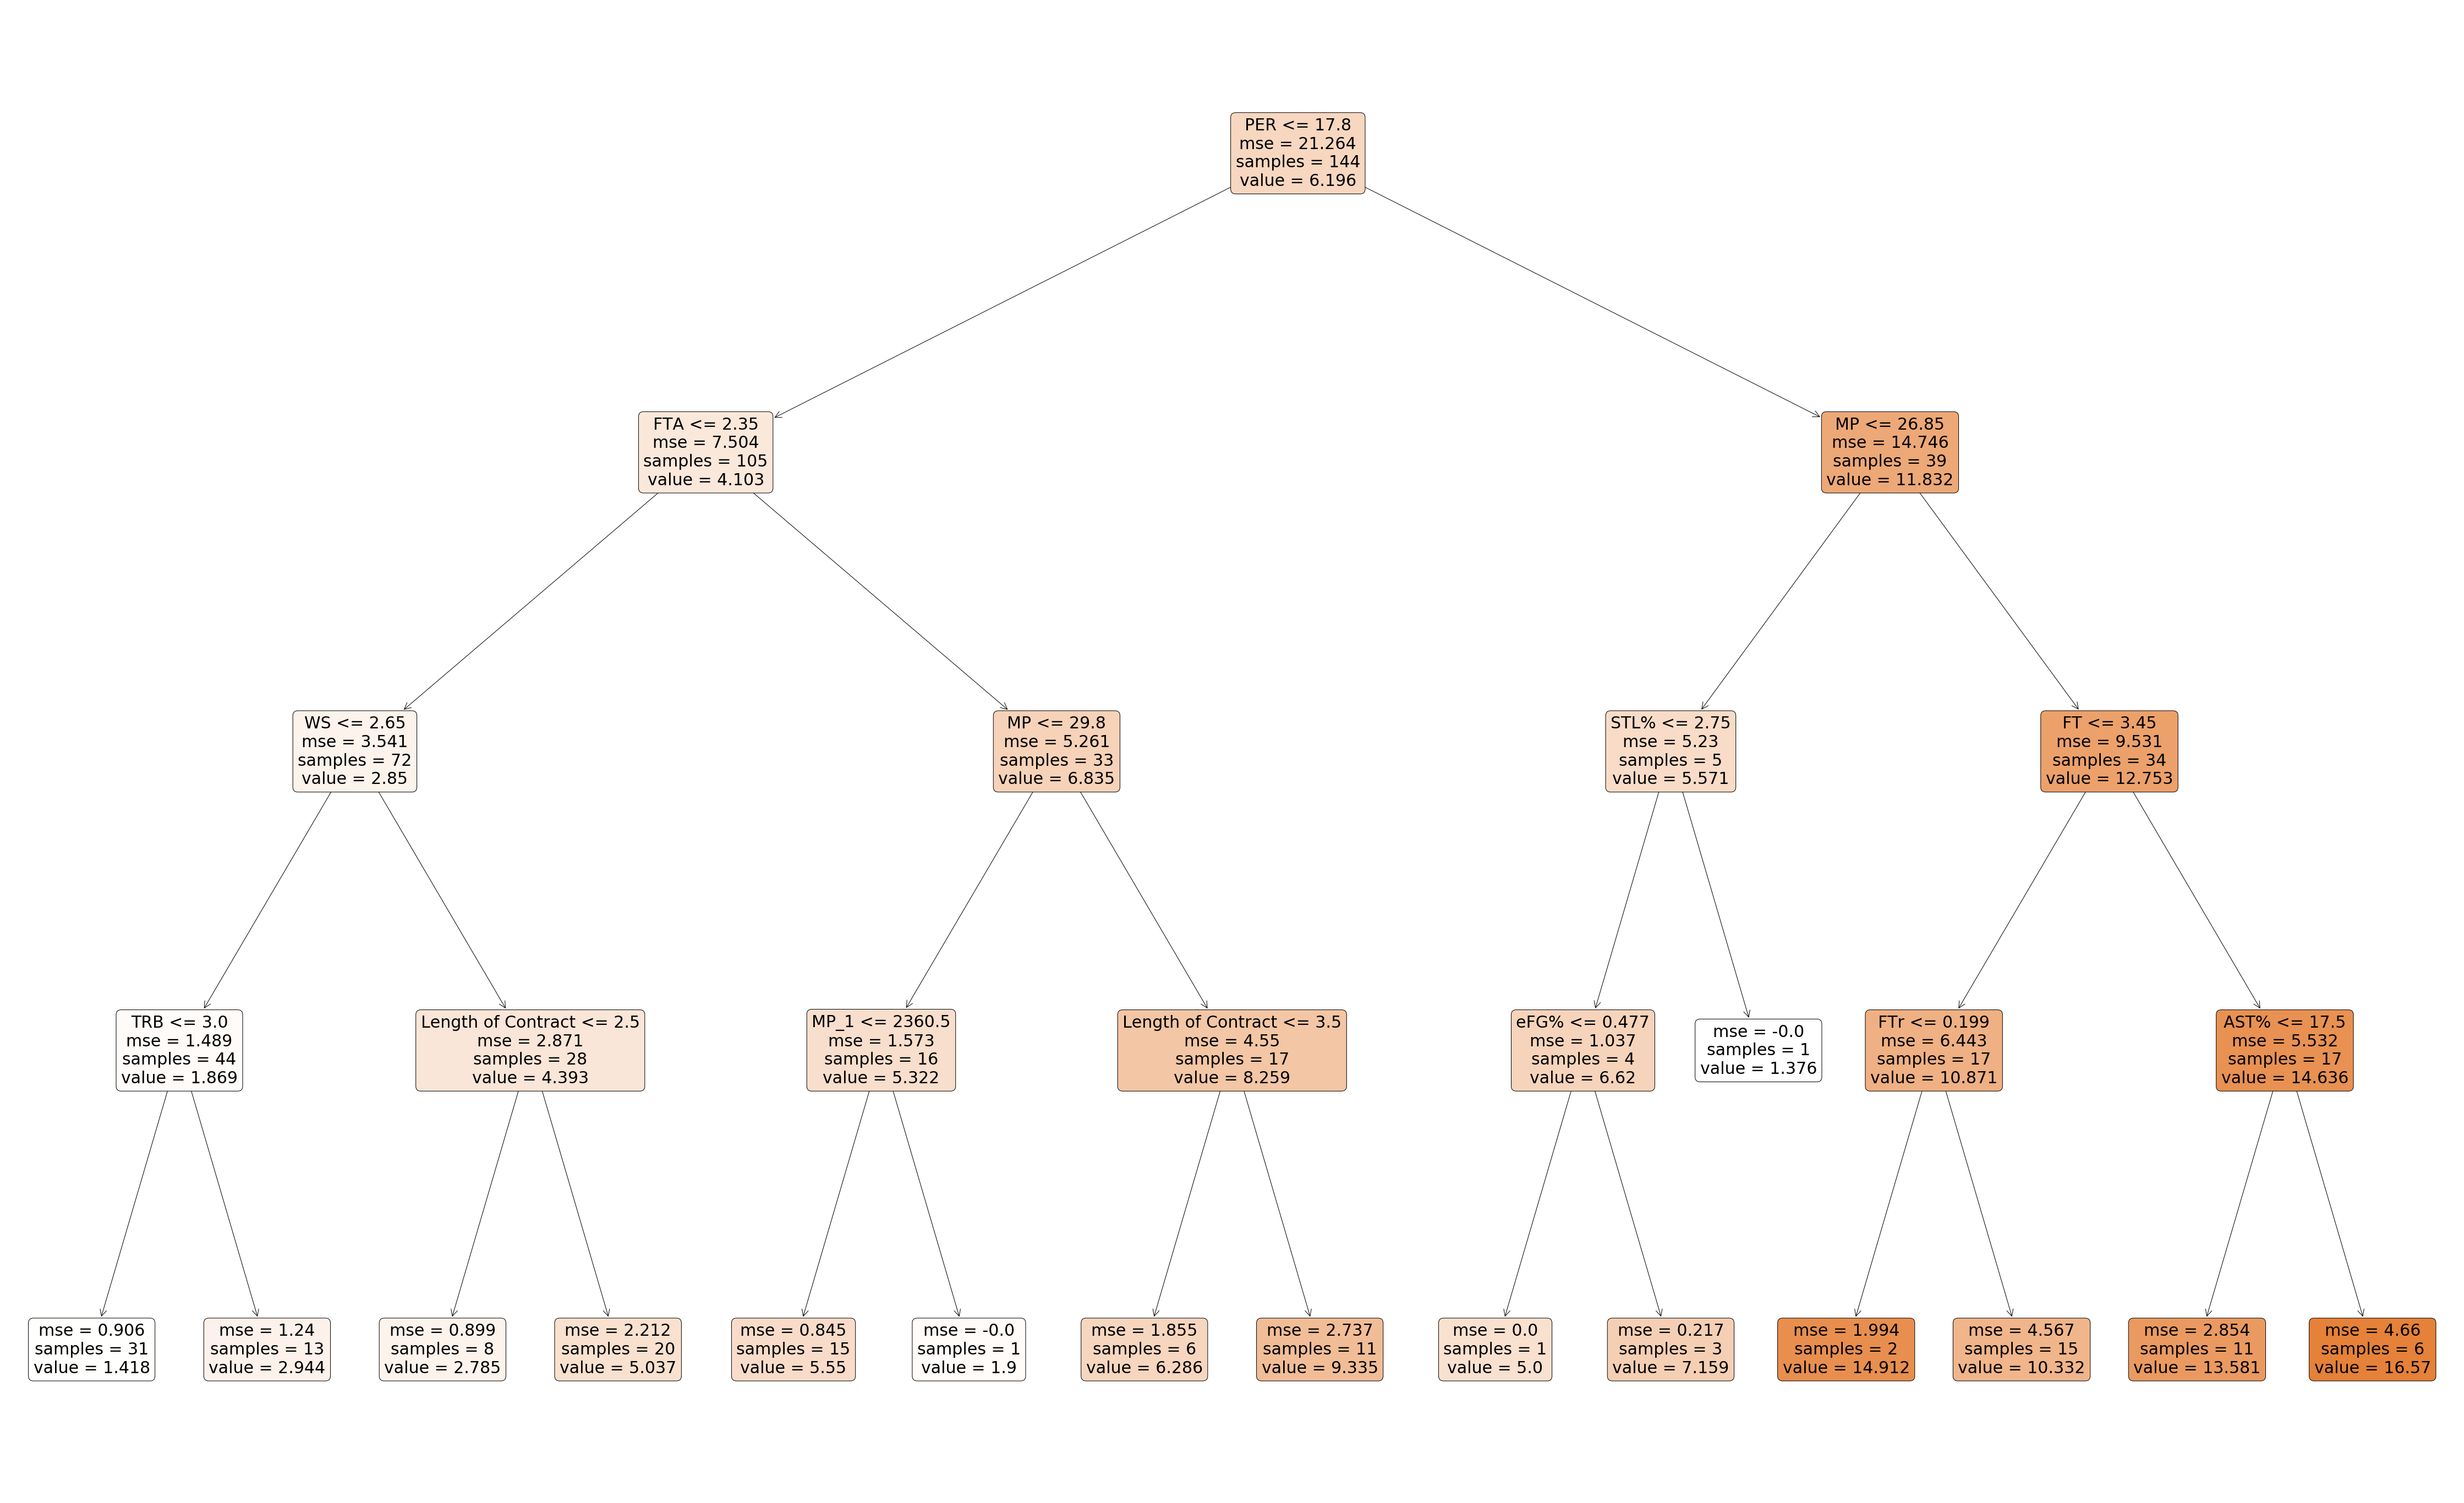

In [61]:
plt.figure(figsize=(80,50)) 
a = plot_tree(clf, feature_names=X_train.columns, #class_names=y.columns, 
              filled=True, rounded=True, fontsize=30) 
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error

In [63]:
train_pred=clf.predict(X_train)
test_pred = clf.predict(X_test)

In [64]:
mean_squared_error(y_test, test_pred)

7.399916663260139

In [67]:
from sklearn.neighbors import KNeighborsRegressor

In [94]:
knn = KNeighborsRegressor(n_neighbors=3)
knn = knn.fit(X_train, y_train)

In [95]:
train_pred1 = knn.predict(X_train)
test_pred1 = knn.predict(X_test)

In [96]:
mean_squared_error(y_train, train_pred1)

6.244404279019812

In [97]:
from sklearn import svm

In [99]:
regr = svm.SVR()
regr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [101]:
train_pred2 = regr.predict(X_train)
test_pred2 = regr.predict(X_test)

In [102]:
mean_squared_error(y_train, train_pred2)

13.286734787392671

In [103]:
mean_squared_error(y_test, test_pred2)

14.624968133494557